## Linear Regression Assignment

### Importing and Understanding Data

In [7]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Importing Housing.csv
day = pd.read_csv('F:/AI ML/ML1/Bike Sharing Assignmnt/day.csv')

In [11]:
# Looking at the first five rows
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
day.shape

(730, 16)

In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [14]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [15]:
day['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [16]:
day['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [154]:
day['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [17]:
day['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [18]:
day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

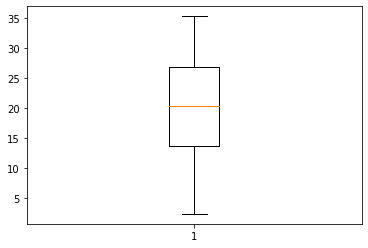

In [19]:
plt.boxplot(day['temp'])
plt.show()

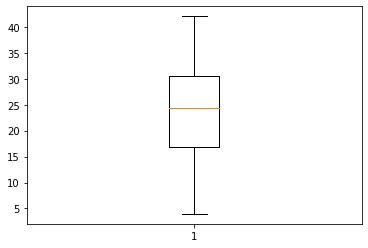

In [160]:
plt.boxplot(day['atemp'])
plt.show()

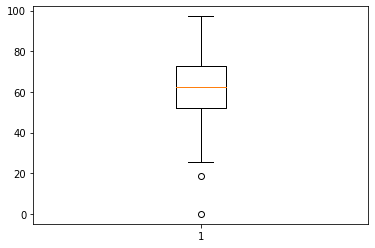

In [20]:
plt.boxplot(day['hum'])
plt.show()

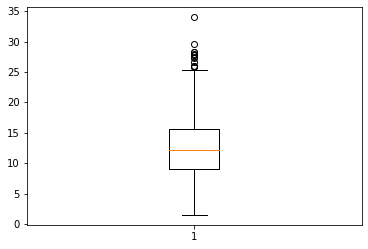

In [22]:
plt.boxplot(day['windspeed'])
plt.show()

In [23]:
day['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [24]:
day['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Data Preparation

In [25]:
# Check the housing dataframe now

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

The variable `weathersit` has three levels whereas 'season' has four levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [31]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
# Let's drop the first column from status df using 'drop_first = True'

status1 = pd.get_dummies(day['weathersit'],drop_first=True)
status2 =pd.get_dummies(day['season'],drop_first=True)
status3 =pd.get_dummies(day['mnth'],drop_first=True)

# Check what the dataset 'status' looks like
status1.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [32]:
status2.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [33]:
status3.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [34]:

# Add the results to the original housing dataframe
day1 = pd.concat([day, status1,status2,status3], axis = 1)

# Now let's see the head of our dataframe.
day1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,3,4,5,6,7,8,9,10,11,12
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Drop 'furnishingstatus' as we have created the dummies for it



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,1,2,3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [35]:
day1.drop(['weathersit'], axis = 1, inplace = True)

In [36]:
day1.drop(['instant'], axis = 1, inplace = True)

In [37]:
day1.drop(['dteday'], axis = 1, inplace = True)

In [38]:
day1.drop(['season'], axis = 1, inplace = True)


In [39]:
day1.drop(['mnth'], axis = 1, inplace = True)

In [70]:
day1.drop(['casual'], axis = 1, inplace = True)

In [71]:
day1.drop(['registered'], axis = 1, inplace = True)

In [72]:
day1.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,WS2,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
day1.columns = ['yr','holiday','weekday','workingday','temp','atemp','hum','windspeed','cnt','WS2','WS3','S2','S3','S4','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12']
day1.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,WS2,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
final_day=day1

In [75]:
final_day.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,WS2,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
final_day['WS2'].value_counts()

0    484
1    246
Name: WS2, dtype: int64

In [49]:
final_day['WS3'].value_counts()

0    709
1     21
Name: WS3, dtype: int64

In [50]:
final_day['S2'].value_counts()

0    546
1    184
Name: S2, dtype: int64

In [51]:
final_day['S3'].value_counts()

0    542
1    188
Name: S3, dtype: int64

In [53]:
final_day['S4'].value_counts()

0    552
1    178
Name: S4, dtype: int64

### Data Visualization


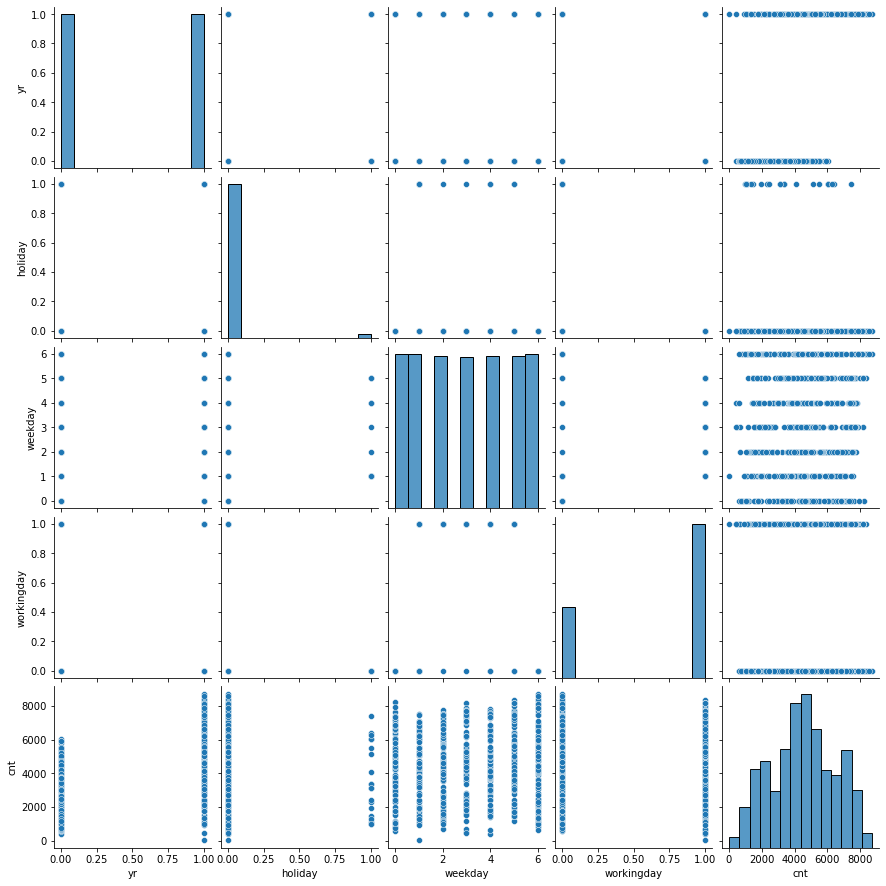

In [54]:
sns.pairplot(final_day[['yr','holiday','weekday','workingday','cnt']])

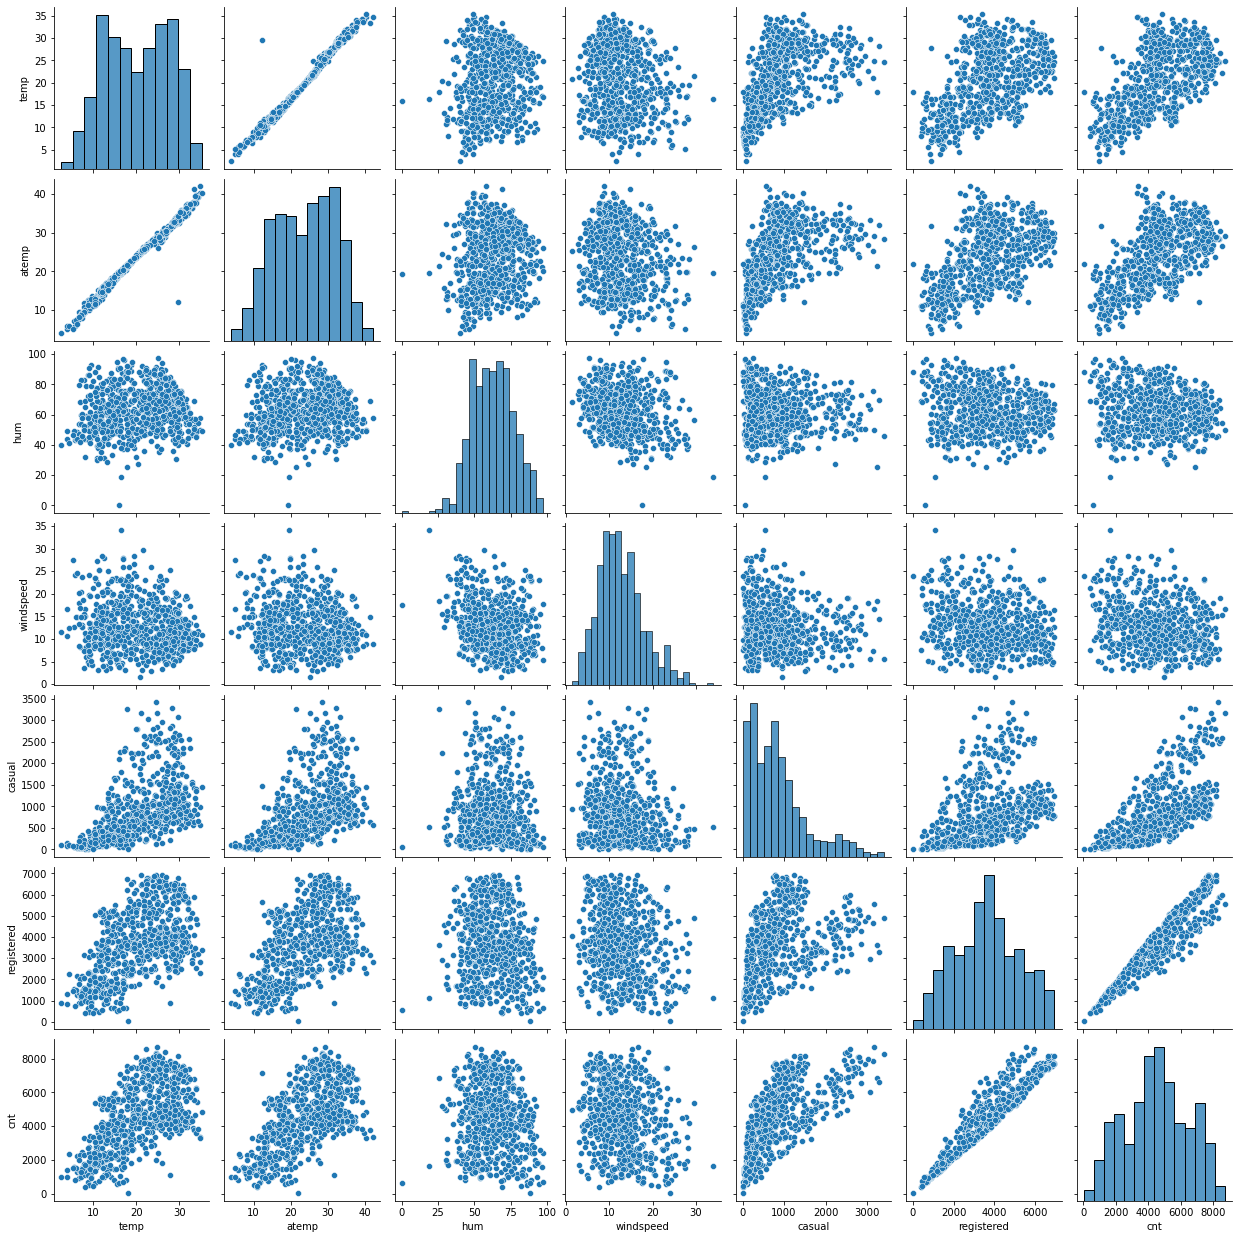

In [55]:
sns.pairplot(final_day[['temp','atemp','hum','windspeed','casual','registered','cnt']])

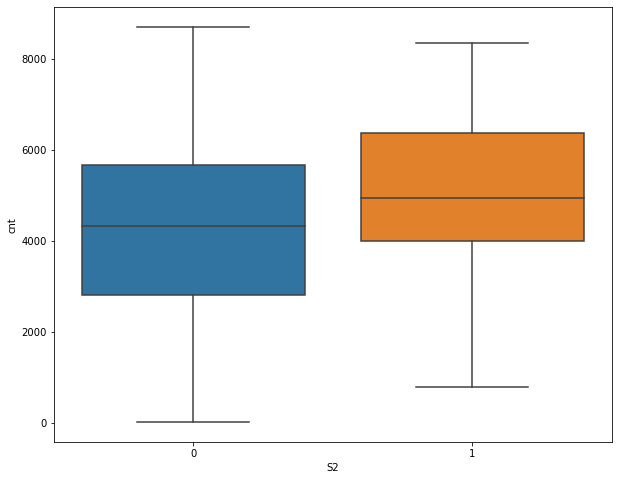

In [57]:
plt.figure(figsize=(10,8))
sns.boxplot(x='S2',y='cnt',data=final_day)
plt.show()

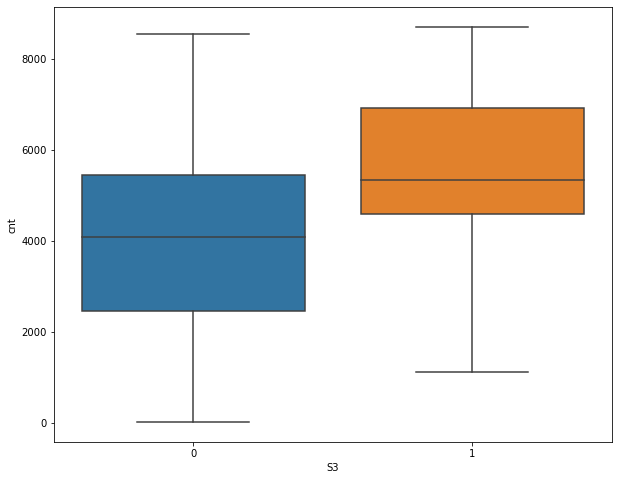

In [58]:
plt.figure(figsize=(10,8))
sns.boxplot(x='S3',y='cnt',data=final_day)
plt.show()

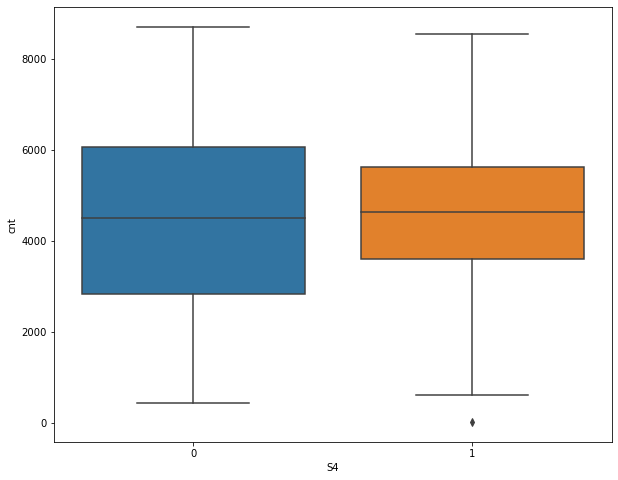

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(x='S4',y='cnt',data=final_day)
plt.show()

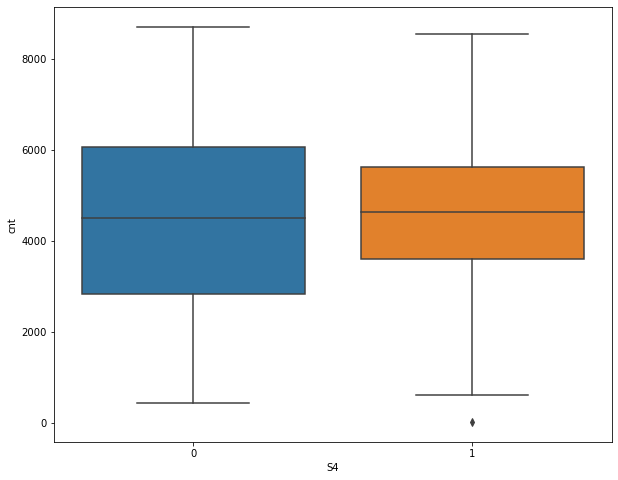

In [60]:
plt.figure(figsize=(10,8))
sns.boxplot(x='S4',y='cnt',data=final_day)
plt.show()

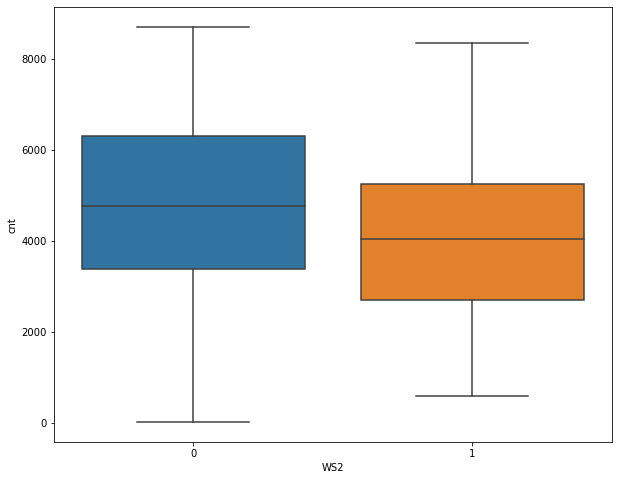

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(x='WS2',y='cnt',data=final_day)
plt.show()

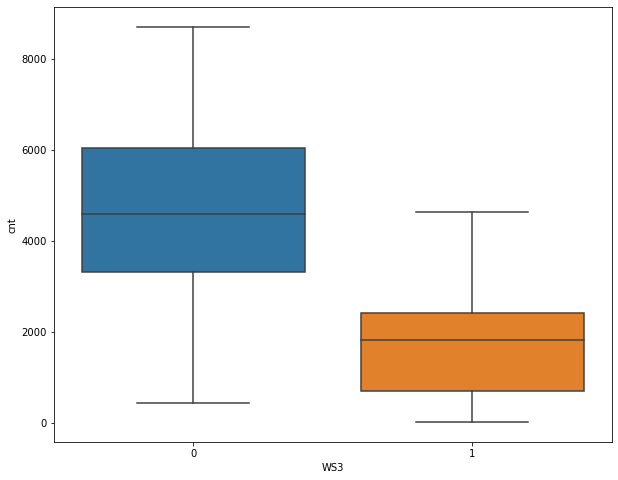

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(x='WS3',y='cnt',data=final_day)
plt.show()

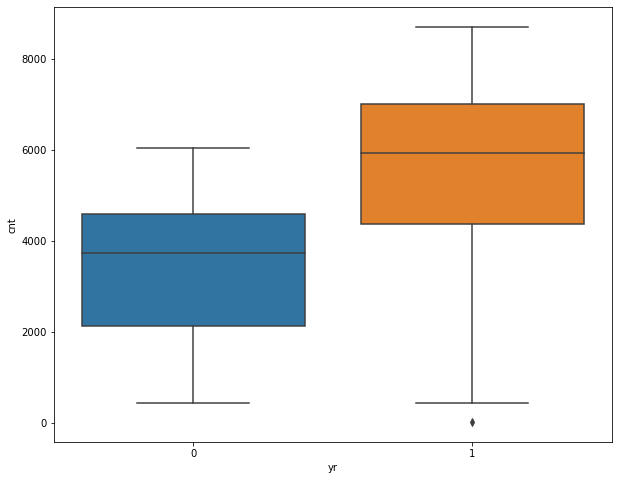

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(x='yr',y='cnt',data=final_day)
plt.show()

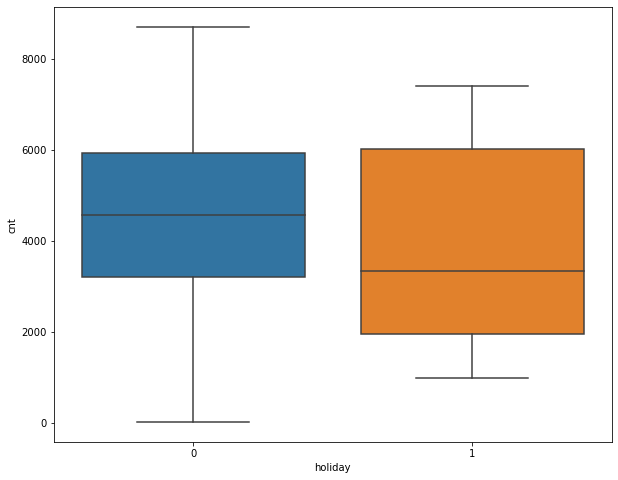

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(x='holiday',y='cnt',data=final_day)
plt.show()

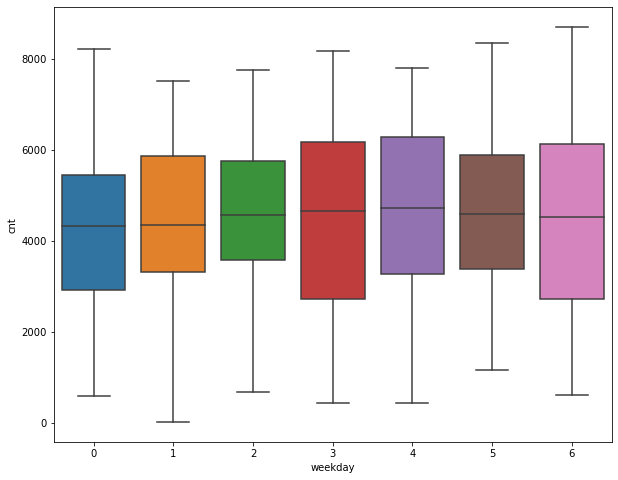

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weekday',y='cnt',data=final_day)
plt.show()

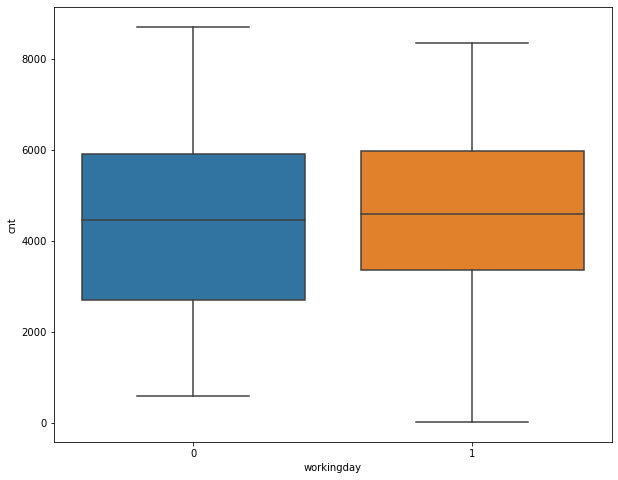

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(x='workingday',y='cnt',data=final_day)
plt.show()

In [77]:
df=final_day
df.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'WS2', 'WS3', 'S2', 'S3', 'S4', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12'],
      dtype='object')

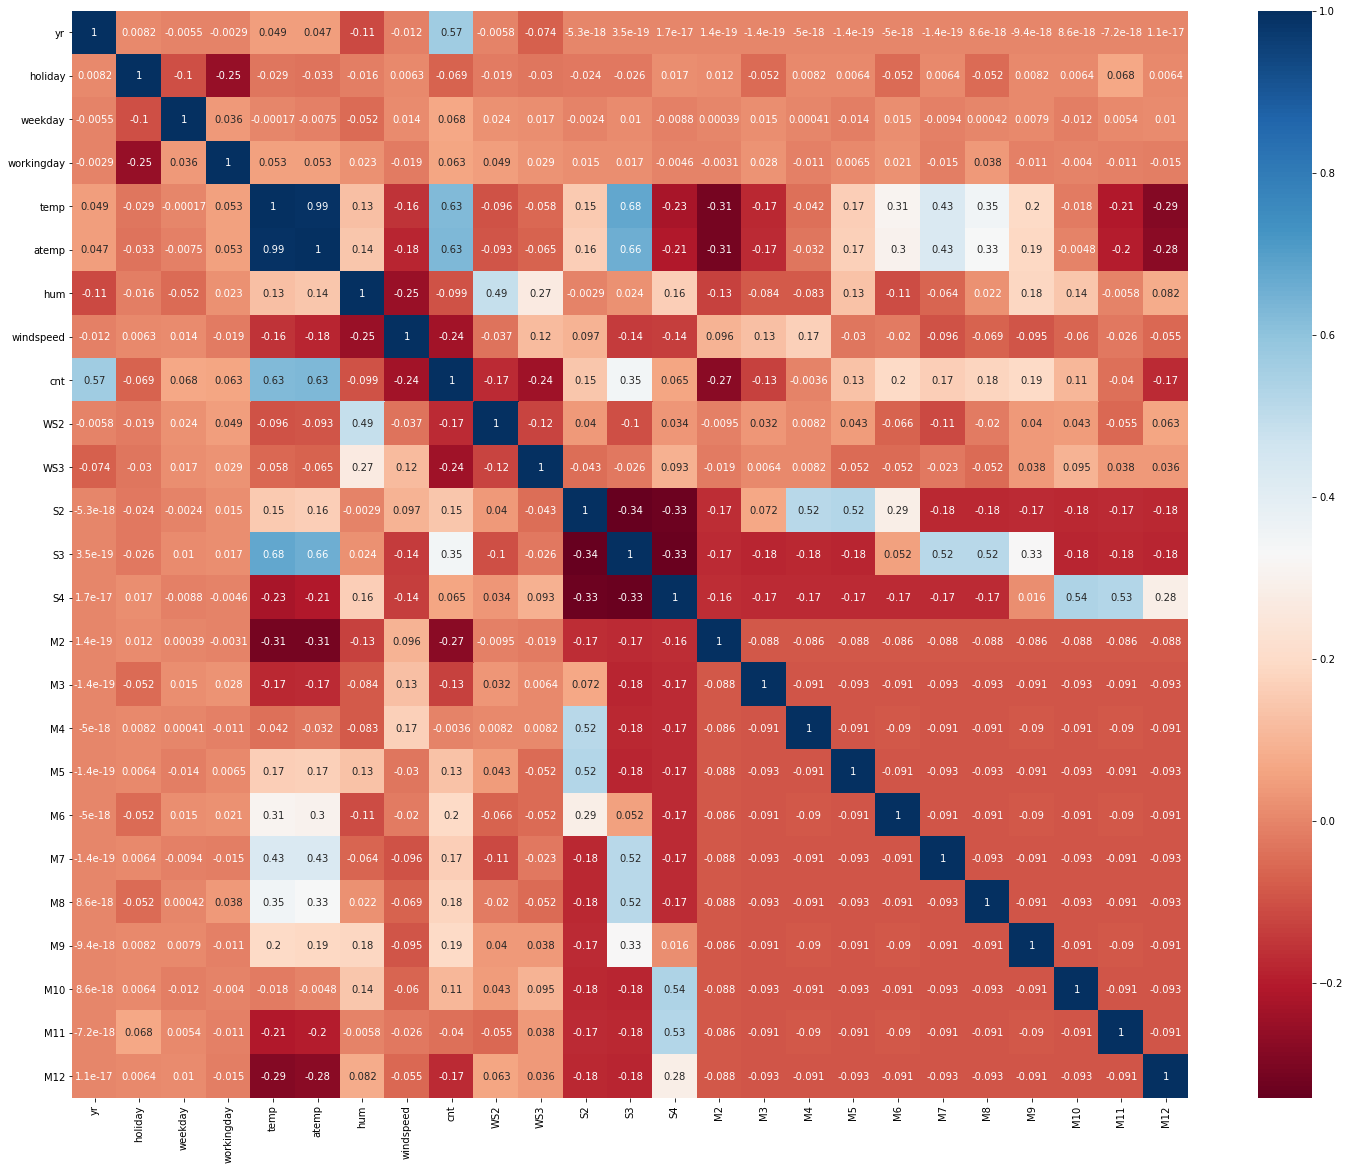

In [78]:
plt.figure(figsize = (25,20))
sns.heatmap(final_day.corr(), annot = True, cmap="RdBu")
plt.show()

## Splitting the Data into Training and Testing Sets

In [129]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(final_day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [133]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,WS2,...,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
653,1,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,...,0,1,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [135]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [136]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 15),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('WS2', False, 2),
 ('WS3', True, 1),
 ('S2', True, 1),
 ('S3', False, 4),
 ('S4', True, 1),
 ('M2', False, 10),
 ('M3', False, 5),
 ('M4', False, 7),
 ('M5', False, 6),
 ('M6', False, 8),
 ('M7', False, 13),
 ('M8', True, 1),
 ('M9', True, 1),
 ('M10', False, 3),
 ('M11', False, 12),
 ('M12', False, 11)]

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'WS3', 'S2', 'S4', 'M8',
       'M9'],
      dtype='object')

In [140]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'WS2', 'S3', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M10', 'M11', 'M12'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [141]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [142]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [143]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [112]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.16e-186
Time:                        23:45:01   Log-Likelihood:                 494.69
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2762      0.026     10.565      0.0

In [144]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,5.87
3,windspeed,3.54
0,yr,1.95
6,S4,1.72
5,S2,1.71
7,M8,1.31
8,M9,1.21
4,WS3,1.08
1,holiday,1.04


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [145]:
y_train_cnt = lm.predict(X_train_rfe)

In [146]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

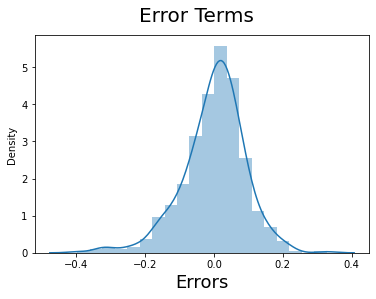

In [147]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [148]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [149]:
y_test = df_test.pop('cnt')
X_test = df_test

In [153]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [154]:
# Making predictions
y_pred = lm.predict(X_test_new)

ValueError: shapes (219,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

## Model Evaluation

In [155]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

NameError: name 'y_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [156]:
X_test_new

,const,yr,holiday,hum,windspeed,WS3,S2,S4,M8,M9
184,1.0,0,1,63.7917,5.459106,0,0,0,0,0
535,1.0,1,0,59.2083,7.625404,0,1,0,0,0
299,1.0,0,0,81.2917,13.250121,0,0,1,0,0
221,1.0,0,0,42.4167,13.417286,0,0,0,1,0
152,1.0,0,0,30.5000,19.583229,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,68.7917,11.791732,0,0,0,0,0
702,1.0,1,0,73.3750,11.666643,0,0,1,0,0
127,1.0,0,0,63.1667,5.000712,0,1,0,0,0
640,1.0,1,0,79.3750,4.458569,0,0,1,0,0
